<a href="https://colab.research.google.com/github/alisyap28/tes/blob/main/Salinan_dari_Pendeteksi_Kebersihan_Lingkungan2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od

dataset_url= 'https://www.kaggle.com/mfadliramadhan/spotgarbageupdate'
od.download('https://www.kaggle.com/mfadliramadhan/spotgarbageupdate')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mfadliramadhan
Your Kaggle Key: ··········


100%|██████████| 1.34G/1.34G [00:08<00:00, 171MB/s]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [ ]:
import os
ambigu = os.path.join('/content/spotgarbageupdate/spotgarbage-updated/spotgarbage/ambiguous-annotated-images')
bersih = os.path.join('/content/spotgarbageupdate/spotgarbage-updated/spotgarbage/non-garbage-queried-images')
kotor = os.path.join('/content/spotgarbageupdate/spotgarbage-updated/spotgarbage/garbage-queried-images')

In [ ]:
base_dir = '/content/spotgarbageupdate/spotgarbage-updated/spotgarbage'

In [ ]:
len_ambigu = len(os.listdir(base_dir + "/ambiguous-annotated-images"))
len_bersih = len(os.listdir(base_dir + "/non-garbage-queried-images"))
len_kotor = len(os.listdir(base_dir + "/garbage-queried-images"))

print("count: ")
print("ambigu: " + str(len_ambigu))
print("bersih: " + str(len_bersih))
print("kotor: " + str(len_kotor))
print("total: " + str(len_ambigu + len_bersih + len_kotor))

count: 
ambigu: 49
bersih: 1554
kotor: 907
total: 2510


In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 20,
                                   horizontal_flip = True,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   fill_mode = 'nearest',
                                   validation_split = 0.2)


In [ ]:
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = (150,150),
    batch_size = 32,
    shuffle = True,
    class_mode = 'categorical',
    subset = 'training'
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'validation'
)

Found 1963 images belonging to 3 classes.
Found 489 images belonging to 3 classes.


In [ ]:
from tensorflow.keras.layers import Input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet152V2
model = tf.keras.models.Sequential([
    ResNet152V2(weights="imagenet", include_top=False, input_tensor=Input(shape=(150, 150, 3))),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  
])
model.layers[0].trainable = False

234561536/234545216 [==============================] - 2s 0us/step


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.97 and logs.get('val_accuracy')>0.97):
      print("\nPelatihan dihentikan, Akurasi Model sangat Baik yaitu diatas 97%!")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
# Optimizer dengan learning rate
from tensorflow.keras.optimizers import Adam
adam = Adam(lr=0.0001)
model.compile(loss = 'categorical_crossentropy',
              optimizer = adam,
              metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(
      train_generator,  
      epochs=150, 
      validation_data=validation_generator,
      validation_steps=4, 
      verbose=2,
      callbacks=[callbacks])

Epoch 1/150
62/62 - 106s - loss: 0.8341 - accuracy: 0.8136 - val_loss: 0.4807 - val_accuracy: 0.8672 - 106s/epoch - 2s/step
Epoch 2/150
62/62 - 80s - loss: 0.3582 - accuracy: 0.8726 - val_loss: 0.5146 - val_accuracy: 0.8516 - 80s/epoch - 1s/step
Epoch 3/150
62/62 - 81s - loss: 0.2786 - accuracy: 0.9002 - val_loss: 0.3564 - val_accuracy: 0.8438 - 81s/epoch - 1s/step
Epoch 4/150
62/62 - 82s - loss: 0.2323 - accuracy: 0.9093 - val_loss: 0.6449 - val_accuracy: 0.8438 - 82s/epoch - 1s/step
Epoch 5/150
62/62 - 81s - loss: 0.2233 - accuracy: 0.9185 - val_loss: 0.3966 - val_accuracy: 0.8750 - 81s/epoch - 1s/step
Epoch 6/150
62/62 - 81s - loss: 0.1901 - accuracy: 0.9328 - val_loss: 0.7325 - val_accuracy: 0.8438 - 81s/epoch - 1s/step
Epoch 7/150
62/62 - 81s - loss: 0.1811 - accuracy: 0.9343 - val_loss: 0.6845 - val_accuracy: 0.8438 - 81s/epoch - 1s/step
Epoch 8/150
62/62 - 81s - loss: 0.1528 - accuracy: 0.9460 - val_loss: 0.6245 - val_accuracy: 0.8359 - 81s/epoch - 1s/step
Epoch 9/150
62/62 - 83

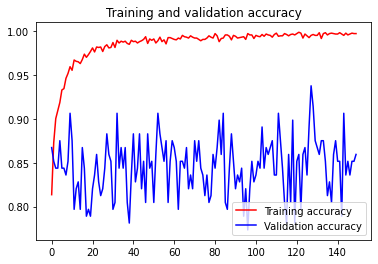

<Figure size 432x288 with 0 Axes>

In [ ]:
# METRIK EVALUSASI
# MEMBUAT PLOT AKURASI TRAINING DAN VALIDATION
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

Saving 5a931422-9447-11e5-9ae8-40f2e96c8ad8.jpg to 5a931422-9447-11e5-9ae8-40f2e96c8ad8.jpg
5a931422-9447-11e5-9ae8-40f2e96c8ad8.jpg
Kotor


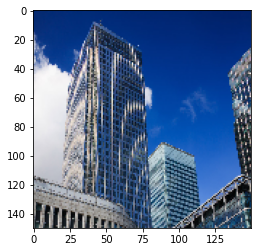

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for up in uploaded.keys():
  path = up
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 10)
  result = np.argmax(classes)

  print(up)

  if classes[0][0] == 1:
      print('Ambigu')
  elif classes[0][1] == 1:
      print('Bersih')
  elif classes[0][2] == 1:
      print('Kotor')

In [ ]:
# Menyimpan Model ke Format TF-Lite
# Mengkonversi Model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Menyimpan Model
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)